# Identication of the consensus mutations between callers in SARCOMA sample

In [1]:
# Needed basic packages
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
from matplotlib_venn import venn3

# 1/ Importing filtered mutation tables

In [2]:
import pandas as pd

# Import filtered mutation files 
mutect_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Sar_Mutect2_VAF.tsv.gz', sep="\t", header=0)
strelka_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Sar_Strelka_VAF_all.tsv.gz', sep="\t", header=0)
sage_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Sar_SAGE_VAF.tsv.gz', sep="\t", header=0)

In [3]:
# Check dimensions of the dataframes so the number of rows is correct
print('Dimensions of melanoma mutations found with Mutect2 (columns x rows):', mutect_df.shape)
print('Dimensions of melanoma mutations found with Strelka (columns x rows):', strelka_df.shape)
print('Dimensions of melanoma mutations found with SAGE (columns x rows):', sage_df.shape)

Dimensions of melanoma mutations found with Mutect2 (columns x rows): (25860, 22)
Dimensions of melanoma mutations found with Strelka (columns x rows): (26140, 20)
Dimensions of melanoma mutations found with SAGE (columns x rows): (21809, 22)


In [4]:
sage_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,n_AF,t_DP,n_DP,t_ref_reads,n_ref_reads,t_alt_reads,n_alt_reads,VAF,mut_type,SAMPLE
0,chr1,104188,.,C,A,644,PASS,RC=TAAACACACACG;RC_IDX=2;RC_LF=CACACACACA;RC_N...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:197,0:0:197:6097,0:206,0:0,0,0,0,0,197,1...",...,0.0,216,197,162,197,53,0,0.245,SNV,sarcoma
1,chr1,843320,.,G,A,1733,PASS,LPS=1;LPS_RC=8;RC=GAAACA;RC_IDX=3;RC_LF=CAAAGA...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:125,0:0:125:3974,0:127,0:0,0,0,0,0,125,1...",...,0.0,136,125,67,125,69,0,0.507,SNV,sarcoma
2,chr1,1118520,.,C,T,941,PASS,RC=TGTGA;RC_IDX=2;RC_LF=GACGAGGCCA;RC_NM=1;RC_...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:148,0:0:148:4278,0:155,0:0,0,0,0,0,148,1...",...,0.0,143,148,98,148,45,0,0.315,SNV,sarcoma
3,chr1,1136548,.,G,T,2201,PASS,RC=CATCC;RC_IDX=2;RC_LF=GCTGAGTGGC;RC_NM=1;RC_...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:124,0:0:124:3979,0:128,0:0,0,0,0,0,124,1...",...,0.0,143,124,54,124,89,0,0.622,SNV,sarcoma
4,chr1,1182738,.,C,T,738,PASS,RC=GGTGTGTGG;RC_IDX=2;RC_LF=GCTGGGGCCA;RC_NM=1...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:159,0:0:159:4649,0:173,0:0,0,0,0,0,159,1...",...,0.0,142,159,102,159,40,0,0.282,SNV,sarcoma


## a) Find the number of common mutations with the callers

In [5]:
#Add a new column in mutect/strelka tables joining the CHROM-POS-REF-ALT information and extract it as a list

mutect_df['mut'] = mutect_df.apply(lambda row: row['CHROM']+'_'+str(row['POS'])+'_'+row['REF']+'_'+row['ALT'],axis=1)
m_list = mutect_df['mut'].tolist()

strelka_df['mut'] = strelka_df.apply(lambda row: row['CHROM']+'_'+str(row['POS'])+'_'+row['REF']+'_'+row['ALT'],axis=1)
s_list = strelka_df['mut'].tolist()

sage_df['mut'] = sage_df.apply(lambda row: row['CHROM']+'_'+str(row['POS'])+'_'+row['REF']+'_'+row['ALT'],axis=1)
sage_list = sage_df['mut'].tolist()

# Convert to a set function to obtain a unique collection of elements
set_m = set(m_list)
set_s = set(s_list)
set_sage = set(sage_list)

In [6]:
# Check if number of mutations coincides with previous data
print(len(set_m))
print(len(set_s))
print(len(set_sage))

25860
26140
21809


Text(0.5, 1.0, 'Mutaciones Sarcoma')

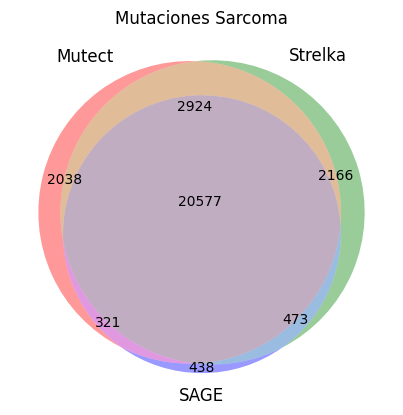

In [7]:
venn3([set_m,set_s, set_sage],set_labels=['Mutect','Strelka','SAGE'])
plt.title('Mutaciones Sarcoma')

## b) Obtain the list of mutations in a minimum of 2 callers

In [8]:
# Now merge based on "mut" column, in two-by-two comparisons since we want the common mutations in a minimum of two callers (how=inner)
mutstr_common_df = pd.merge(mutect_df, strelka_df, how ="inner", on=['mut'], suffixes=['_Mut','_Str'], indicator = True)
mutsage_common_df = pd.merge(mutect_df, sage_df, how ="inner", on=['mut'], suffixes=['_Mut','_SAGE'], indicator = True)
strsage_common_df = pd.merge(strelka_df, sage_df, how ="inner", on=['mut'], suffixes=['_Str','_SAGE'], indicator = True)

# Now we have the common mutations between callers.
# Since we priorize information from SAGE > Mutect2 callers, we will delete all information from the caller (Strelka information is not considered in any case)
mutstr_common_df = mutstr_common_df.loc[:, ~mutstr_common_df.columns.str.endswith('_Str')] # here we delete columns from Strelka and remain Mutect2 columns
mutsage_common_df = mutsage_common_df.loc[:, ~mutsage_common_df.columns.str.endswith('_Mut')] # here we delete columns from mutect and remain SAGE columns
strsage_common_df = strsage_common_df.loc[:, ~strsage_common_df.columns.str.endswith('_Str')] # here we delete columns from Strelka and remain SAGE columns

In [9]:
strsage_common_df

,Mut_type,mut,CHROM_SAGE,POS_SAGE,ID_SAGE,REF_SAGE,ALT_SAGE,QUAL_SAGE,FILTER_SAGE,INFO_SAGE,...,t_DP_SAGE,n_DP_SAGE,t_ref_reads_SAGE,n_ref_reads_SAGE,t_alt_reads_SAGE,n_alt_reads_SAGE,VAF_SAGE,mut_type,SAMPLE_SAGE,_merge
0,SNV,chr1_104188_C_A,chr1,104188,.,C,A,644,PASS,RC=TAAACACACACG;RC_IDX=2;RC_LF=CACACACACA;RC_N...,...,216,197,162,197,53,0,0.245,SNV,sarcoma,both
1,SNV,chr1_843320_G_A,chr1,843320,.,G,A,1733,PASS,LPS=1;LPS_RC=8;RC=GAAACA;RC_IDX=3;RC_LF=CAAAGA...,...,136,125,67,125,69,0,0.507,SNV,sarcoma,both
2,SNV,chr1_1118520_C_T,chr1,1118520,.,C,T,941,PASS,RC=TGTGA;RC_IDX=2;RC_LF=GACGAGGCCA;RC_NM=1;RC_...,...,143,148,98,148,45,0,0.315,SNV,sarcoma,both
3,SNV,chr1_1136548_G_T,chr1,1136548,.,G,T,2201,PASS,RC=CATCC;RC_IDX=2;RC_LF=GCTGAGTGGC;RC_NM=1;RC_...,...,143,124,54,124,89,0,0.622,SNV,sarcoma,both
4,SNV,chr1_1182738_C_T,chr1,1182738,.,C,T,738,PASS,RC=GGTGTGTGG;RC_IDX=2;RC_LF=GCTGGGGCCA;RC_NM=1...,...,142,159,102,159,40,0,0.282,SNV,sarcoma,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21045,INDEL,chrY_11362309_CA_C,chrY,11362309,.,CA,C,274,PASS,MH=A;RC=AACAAAAAAAGT;RC_IDX=2;RC_LF=ATAGCCTACC...,...,132,102,112,102,20,0,0.152,INDEL,sarcoma,both
21046,INDEL,chrY_11712779_AG_A,chrY,11712779,.,AG,A,552,PASS,MH=G;RC=AAAGA;RC_IDX=2;RC_LF=AATGGAACTG;RC_MH=...,...,53,61,23,61,30,0,0.566,INDEL,sarcoma,both
21047,INDEL,chrY_13880669_AG_A,chrY,13880669,.,AG,A,634,PASS,MH=G;RC=AAAGA;RC_IDX=2;RC_LF=ATCATCAATA;RC_MH=...,...,59,72,27,72,32,0,0.542,INDEL,sarcoma,both
21048,INDEL,chrY_16426090_TA_T,chrY,16426090,.,TA,T,338,PASS,MH=A;RC=ATATATAAATT;RC_IDX=5;RC_LF=AGAAAATACC;...,...,34,49,14,49,20,0,0.588,INDEL,sarcoma,both


In [10]:
# Now merge the three callers to obtain those mutations that are shared by all of them
mutstrsage_common_df = pd.merge(mutstr_common_df, sage_df, how ="inner", on=['mut'], suffixes=['_MutStr','_SAGE'])
mutstrsage_common_df = mutstrsage_common_df.loc[:, ~mutstrsage_common_df.columns.str.endswith('_MutStr')] # here we delete columns from Mutect2-Strelka and remain SAGE columns

In [11]:
mutstrsage_common_df.head()

,CHROM_Mut,POS_Mut,ID_Mut,REF_Mut,ALT_Mut,QUAL_Mut,FILTER_Mut,INFO_Mut,FORMAT_Mut,NORMAL_Mut,...,n_AF_SAGE,t_DP,n_DP,t_ref_reads,n_ref_reads,t_alt_reads,n_alt_reads,VAF,mut_type_SAGE,SAMPLE
0,chr1,104188,.,C,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=36,157|24,22;...",GT:AD:AF:DP:F1R2:F2R1:FAD:PGT:PID:PS:SB,"0|0:124,0:7.128e-03:124:33,0:29,0:125,0:0|1:10...",...,0.0,216,197,162,197,53,0,0.245,SNV,sarcoma
1,chr1,843320,.,G,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=105,87|38,31;...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:126,0:7.857e-03:126:58,0:63,0:125,0:67,59,0,0",...,0.0,136,125,67,125,69,0,0.507,SNV,sarcoma
2,chr1,1118520,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=120,130|19,26...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:153,0:6.470e-03:153:62,0:83,0:152,0:78,75,0,0",...,0.0,143,148,98,148,45,0,0.315,SNV,sarcoma
3,chr1,1136548,.,G,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=86,92|45,45;D...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:123,0:8.107e-03:123:60,0:59,0:121,0:57,66,0,0",...,0.0,143,124,54,124,89,0,0.622,SNV,sarcoma
4,chr1,1182738,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=136,140|23,19...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:167,0:5.950e-03:167:85,0:68,0:165,0:84,83,0,0",...,0.0,142,159,102,159,40,0,0.282,SNV,sarcoma


In [12]:
# Add Caller intersection name as a column
mutstr_common_df = mutstr_common_df.assign(Caller_intersec='Mutect_Strelka')
mutsage_common_df = mutsage_common_df.assign(Caller_intersec='Mutect_SAGE')
strsage_common_df = strsage_common_df.assign(Caller_intersec='Strelka_SAGE')
mutstrsage_common_df = strsage_common_df.assign(Caller_intersec='Mutect_Strelka_SAGE')

In [13]:
for col in mutstr_common_df.columns:
    print(col)

CHROM_Mut
POS_Mut
ID_Mut
REF_Mut
ALT_Mut
QUAL_Mut
FILTER_Mut
INFO_Mut
FORMAT_Mut
NORMAL_Mut
TUMOR_Mut
t_AF
n_AF
t_DP_Mut
n_DP_Mut
t_ref_reads_Mut
n_ref_reads_Mut
t_alt_reads_Mut
n_alt_reads_Mut
VAF_Mut
mut_type
SAMPLE_Mut
mut
Mut_type
_merge
Caller_intersec


In [14]:
# Define a custom function to remove the indexes from columns
def remove_colindex(column):
    return column.replace('_Mut', '')

def remove_colindex2(column):
    return column.replace('_SAGE', '')

# Apply the custom function to the date column names using a list comprehension
mutstr_common_df.columns = [remove_colindex(col) for col in mutstr_common_df.columns]
mutsage_common_df.columns = [remove_colindex2(col) for col in mutsage_common_df.columns]
strsage_common_df.columns = [remove_colindex2(col) for col in strsage_common_df.columns]
mutstrsage_common_df.columns = [remove_colindex2(col) for col in mutstrsage_common_df.columns]

In [15]:
# Now that each intersection is controlled in a column, reorder and rename all the other columns prior to merge 

# Reorder columns according to a list with the same column names
cols = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'NORMAL', 'TUMOR','t_AF', 'n_AF', 't_DP','n_DP','t_alt_reads', 'n_alt_reads', 't_ref_reads','n_ref_reads', 'VAF', 'mut_type', 'Caller_intersec', 'SAMPLE','mut']

mutstr_common_df = mutstr_common_df.reindex(cols, axis = 1)
strsage_common_df = strsage_common_df.reindex(cols, axis = 1)
mutsage_common_df = mutsage_common_df.reindex(cols, axis = 1)
strsage_common_df = strsage_common_df.reindex(cols, axis = 1)
mutstrsage_common_df = mutstrsage_common_df.reindex(cols, axis = 1)

In [16]:
# Check column order of each dataframe: 
for col in mutstrsage_common_df.columns:
    print(col)

CHROM
POS
ID
REF
ALT
QUAL
FILTER
INFO
FORMAT
NORMAL
TUMOR
t_AF
n_AF
t_DP
n_DP
t_alt_reads
n_alt_reads
t_ref_reads
n_ref_reads
VAF
mut_type
Caller_intersec
SAMPLE
mut


In [17]:
# Join the list of common mutations again (keep in mind some of them will be repeated!)
final_mutations_df = pd.concat([mutstr_common_df, mutsage_common_df,strsage_common_df,mutstrsage_common_df], ignore_index=True) # ignore index omits the index number of each row in the original table

# Now convert it into a dataframe
final_mutations_df = pd.DataFrame(final_mutations_df) 
print(len(final_mutations_df)) # see that some values are repeated!

# Use drop duplicates pandas function to exclude repeated values based on 'mut' column
final_mutations_df = final_mutations_df.drop_duplicates(subset=['mut'])
print(len(final_mutations_df))

86499
24295


In [18]:
final_mutations_df.tail()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut
65377,chr20,33319428,.,CA,C,410,PASS,MH=A;RC=CTCAAAAAAAAAAAAAATC;RC_IDX=2;RC_LF=GAG...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:118,0:0:119:3798,0:138,0:0,0,0,0,0,118,1...",...,119,35,0,102,118,0.255,INDEL,Strelka_SAGE,sarcoma,chr20_33319428_CA_C
65386,chr21,19740095,.,G,GA,710,PASS,LPS=5827;LPS_RC=53;MH=A;RC=GGAGAAAAAAAAAAAAAG;...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:103,0:0:103:2880,0:118,0:0,0,0,0,0,103,1...",...,103,56,0,81,103,0.397,INDEL,Strelka_SAGE,sarcoma,chr21_19740095_G_GA
65392,chr21,32476143,.,C,CT,532,PASS,MH=T;RC=CTCTTTTTTTTTTTC;RC_IDX=2;RC_LF=TAGCTTT...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:114,0:0:115:3509,0:122,0:0,0,0,0,0,114,1...",...,115,37,0,106,114,0.259,INDEL,Strelka_SAGE,sarcoma,chr21_32476143_C_CT
65416,chrX,39792056,.,GCTA,G,642,PASS,LPS=6004;LPS_RC=35;RC=TGTGTGTT;RC_IDX=3;RC_LF=...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:58,0:0:58:1947,0:61,0:0,0,0,0,0,58,58:0:...",...,58,35,0,59,58,0.372,INDEL,Strelka_SAGE,sarcoma,chrX_39792056_GCTA_G
65444,chrY,11362309,.,CA,C,274,PASS,MH=A;RC=AACAAAAAAAGT;RC_IDX=2;RC_LF=ATAGCCTACC...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:102,0:0:102:3388,0:112,0:0,0,0,0,0,102,1...",...,102,20,0,112,102,0.152,INDEL,Strelka_SAGE,sarcoma,chrY_11362309_CA_C


In [19]:
# Reorder by chromosomes then by position in CHROM and POS columns

# Define a list to order by chromosomes
chrom = ['chr1','chr2','chr3','chr4','chr5','chr6', 'chr7', 'chr8', 'chr9', 'chr10','chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chr23', 'chrX', 'chrY']

# Create a categorical variable for chromosomes
final_mutations_df['CHROM'] = pd.Categorical(final_mutations_df['CHROM'], categories=chrom, ordered=True) # in categories we indicate the order
final_mutations_df = final_mutations_df.sort_values(by=['CHROM','POS']) # it will reorder based on CHROM and POS
final_mutations_df.reset_index(drop=True, inplace=True) # Reset indexes

In [20]:
final_mutations_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut
0,chr1,104188,.,C,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=36,157|24,22;...",GT:AD:AF:DP:F1R2:F2R1:FAD:PGT:PID:PS:SB,"0|0:124,0:7.128e-03:124:33,0:29,0:125,0:0|1:10...",...,124,46,0,69,124,0.400000,SNV,Mutect_Strelka,sarcoma,chr1_104188_C_A
1,chr1,843320,.,G,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=105,87|38,31;...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:126,0:7.857e-03:126:58,0:63,0:125,0:67,59,0,0",...,126,69,0,66,126,0.511111,SNV,Mutect_Strelka,sarcoma,chr1_843320_G_A
2,chr1,1014876,.,G,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=162,109|4,2;D...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:141,0:7.025e-03:141:64,0:69,0:139,0:85,56,0,0",...,141,6,0,130,141,0.044118,SNV,Mutect_Strelka,sarcoma,chr1_1014876_G_T
3,chr1,1118520,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=120,130|19,26...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:153,0:6.470e-03:153:62,0:83,0:152,0:78,75,0,0",...,153,45,0,97,153,0.316901,SNV,Mutect_Strelka,sarcoma,chr1_1118520_C_T
4,chr1,1136548,.,G,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=86,92|45,45;D...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:123,0:8.107e-03:123:60,0:59,0:121,0:57,66,0,0",...,123,90,0,55,123,0.620690,SNV,Mutect_Strelka,sarcoma,chr1_1136548_G_T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24290,chrY,26654389,.,A,G,864,PASS,RC=GGAGAGGAAT;RC_IDX=6;RC_LF=GTAATGGAGT;RC_NM=...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:57,0:0:58:2084,0:63,0:0,0,0,0,0,57,58:0:...",...,58,41,0,19,57,0.683000,SNV,Strelka_SAGE,sarcoma,chrY_26654389_A_G
24291,chrY,56823266,.,G,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=487,411|29,27...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:456,0:2.167e-03:456:195,0:201,0:448,0:238,...",...,456,56,0,442,456,0.112450,SNV,Mutect_Strelka,sarcoma,chrY_56823266_G_A
24292,chrY,56842066,.,CT,AC,1323,PASS,LPS=6133;LPS_RC=42;RC=ACACACAG;RC_IDX=2;RC_LF=...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:290,0:0:290:9437,0:306,0:0,0,0,0,0,290,2...",...,290,75,0,169,290,0.305000,MNV,Mutect_SAGE,sarcoma,chrY_56842066_CT_AC
24293,chrY,56842087,.,T,C,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=241,235|34,34...",GT:AD:AF:DP:F1R2:F2R1:FAD:PGT:PID:PS:SB,"0|0:295,0:3.303e-03:295:143,0:125,0:295,0:1|0:...",...,295,68,0,181,295,0.273092,SNV,Mutect_Strelka,sarcoma,chrY_56842087_T_C


In [21]:
# Export table as tsv compressed file in directory
# final_mutations_df.to_csv('/workspace/projects/sjd_melos/MAFs_tables/Sar_List_common_mutations_callers.tsv.gz', sep ='\t', index=None, compression = "gzip")

### Histogram VAF common mutations

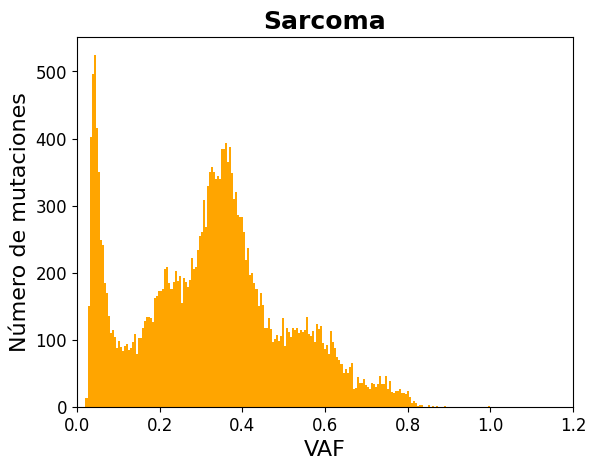

In [22]:
# VAF representation through histogram
plt.hist(final_mutations_df['VAF'].tolist(), bins = 200, color = "orange")
plt.ylabel('Número de mutaciones', fontsize=16)
plt.xlim([0,1.2]) 
plt.xlabel('VAF', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Sarcoma', fontsize=18, weight='bold')
# Export image to directory
plt.savefig('/workspace/projects/sjd_melos/exports_images/density_vaf_sarcoma_consensus.png',dpi=300,transparent=True, format='png', bbox_inches='tight')
plt.show(final_mutations_df['VAF'].tolist()) 